## Objectives 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car

### Business Goal 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Data Understanding

The source data given contains the information about different types of cars across the American market. 

## Step_1: Importing and Understanding Data

In [167]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# Importing CarPrice_Assignment.csv
cardetailsdata = pd.read_csv("CarPrice_Assignment.csv", encoding = "ISO-8859-1")

In [169]:
# Looking at the first 5 rows
cardetailsdata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [170]:
# Looking at the last 5 rows
cardetailsdata.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [171]:
#Check number of rows and columns 
cardetailsdata.shape

(205, 26)

In [172]:
#Check what type of values are stored in the columns
cardetailsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [173]:
# Let's look at some statistical information about our dataframe.
cardetailsdata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step_2: Data Cleaning and Preparation using Exploratory Data Analysis (EDA)

In [174]:
# Lets check the missing values
cardetailsdata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

 ### No missing values in the dataset

In [175]:
#Lets check for duplicate data
print(any(cardetailsdata.duplicated()))      

False


 ### No Duplicate values in the dataset

## Derived Columns
 

 - Company name from Car name
 - power_to_weight_ratio from horsepower and curbweight

As mentioned in the Problem Statement,  there is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. We need to consider only company name as the independent variable for model building. 

So let's extract company name from car name and use it in our model building. Since we dont see much impact of car model on model building we will be dropping the car model from dataset

In [176]:
# Extracting car company name and dropping car Model
cardetailsdata.CarName = cardetailsdata.CarName.apply(lambda x: x.split()[0])
cardetailsdata.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


Divide vehicle’s horsepower by its curb weight. That gives you the power-to-weight ratio, which is represented as horsepower to 10 pounds. The higher the number, the better your car is going to be in terms of performance. 

In [177]:
#Power to Weight Ratio
cardetailsdata['power_to_weight_ratio']=cardetailsdata.horsepower/cardetailsdata.curbweight

 ## Dropping Car_ID column

In [178]:
# Let's check the column name
cardetailsdata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'power_to_weight_ratio'],
      dtype='object')

In [179]:
#Removing car_ID column as this will not impact price column
cardetailsdata.drop('car_ID', axis=1, inplace=True)

 ## Standardizing the String column values

Lets convert all string type column to uppercase to standardise all column value in same format

In [180]:
#Standardising values by converting all String values to Uppercase
column_toupper = ["CarName","fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation",
                   "enginetype", "cylindernumber", "fuelsystem" ]
cardetailsdata[column_toupper] = cardetailsdata[column_toupper].apply(lambda x: x.astype(str).str.upper())

Lets explore carName

In [181]:
cardetailsdata.CarName.value_counts()

TOYOTA         31
NISSAN         18
MAZDA          15
MITSUBISHI     13
HONDA          13
SUBARU         12
PEUGEOT        11
VOLVO          11
VOLKSWAGEN      9
DODGE           9
BMW             8
BUICK           8
PLYMOUTH        7
AUDI            7
SAAB            6
ISUZU           4
PORSCHE         4
JAGUAR          3
ALFA-ROMERO     3
CHEVROLET       3
MAXDA           2
RENAULT         2
VW              2
MERCURY         1
TOYOUTA         1
PORCSHCE        1
VOKSWAGEN       1
Name: CarName, dtype: int64

 ### There are few spelling mistakes which needs to be corrected

In [182]:
# Lets correct the name of carName porsche
cardetailsdata.loc[cardetailsdata['CarName'] == "PORCSHCE", 'CarName'] = "PORSCHE"
# Correct car name for toyata
cardetailsdata.loc[cardetailsdata['CarName'] == "TOYOUTA", 'CarName'] = "TOYOTA"
# Correct CarName of mazda
cardetailsdata.loc[cardetailsdata['CarName'] == "MAXDA", 'CarName'] = "MAZDA"
# Similar issue for volkswagen
cardetailsdata.loc[cardetailsdata['CarName'] == "VW", 'CarName'] = "VOLKSWAGEN"
cardetailsdata.loc[cardetailsdata['CarName'] == "VOKSWAGEN", 'CarName'] = "VOLKSWAGEN"

 ### Analyzing CarName column by plotting graphs

Text(0.5,0,'Count')

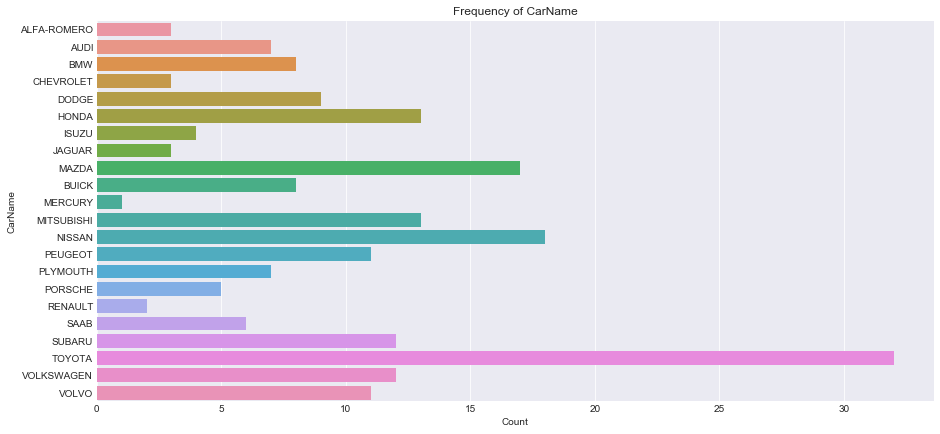

In [183]:
#CarName vs Count
f, axis = plt.subplots(figsize=(15, 7))
sns.countplot(y='CarName', data=cardetailsdata)
plt.title("Frequency of CarName")
plt.ylabel('CarName')
plt.xlabel('Count')

 <b>Observation</b> : Toyata has maximum vechicles followed by Nissan/Mazda.

 ### Let us do some Univariate, Bivariate analysis on other columns

Since we are trying to predict prices with historical data, let’s do a simple histogram plot to see the distribution of prices

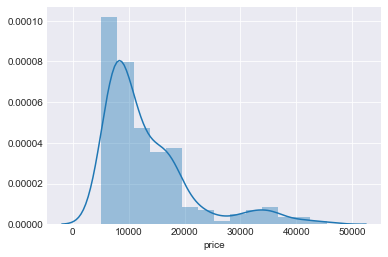

In [184]:
#Plot histogram of Prices (dependent variable)
sns.set_style('darkgrid')
sns.distplot(cardetailsdata.price)

<b>From the above graph we can see that most of the car prices are around 10000 dollars and there are some at the tail end that are over 40000 dollars. These might be newer/sports cars with a lot of options. And there are fewer of them anyhow.</b>

The next step in predictive analytics is to explore our underlying data. Let’s do a few plots of our explantory variables to see how they look against Price.

In [185]:
#Scatter Plot function to understand how independent variables look against dependent variable Price
def scatterPlotForPrice(independentVar,xtitle):
    colors = (0,0,0)
    area = np.pi*3
    plt.scatter(independentVar, cardetailsdata.price, s=area, c=colors, alpha=0.5)
    plt.title('Scatter plot for Price vs '+ xtitle)
    plt.xlabel(xtitle)
    plt.ylabel('Price')
    plt.show()

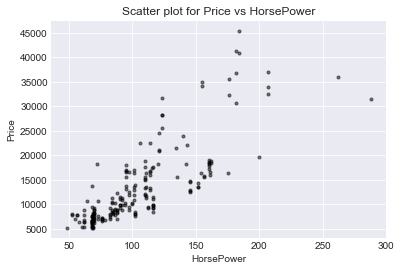

In [186]:
#Scatter Plot (HorsePower vs Price)
scatterPlotForPrice(cardetailsdata.horsepower,'HorsePower')

<b>Observation</b> : Yes, the more horsepower the more expensive. But not always the case. Let’s see how this variable will behave in our model.

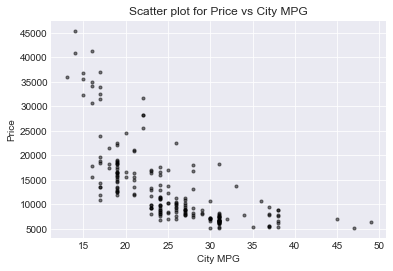

In [187]:
#Scatter Plot (City MPG vs Price)
scatterPlotForPrice(cardetailsdata.citympg,'City MPG')

<b>Observation</b> : We can see that Cars with higher City MPG tend to be cheaper. This makes sense because Small, light cars tend to have better MPG than large, heavy cars. Small cars tend to be cheaper than large cars by virtue of being “less of everything”, so the manufacturers demand less money for the small car built from little material and with little equipment.

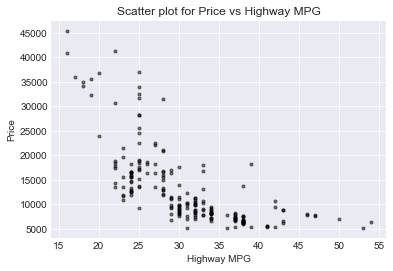

In [188]:
# Scatter Plot (Highway MPG vs Price)
scatterPlotForPrice(cardetailsdata.highwaympg,'Highway MPG')

<b>Observation</b> : We can see that Cars with higher Highway MPG tend to be cheaper. City MPG and Highway MPG show similar variation with Price. Let us check the correlation of these two columns in correlation matrix.

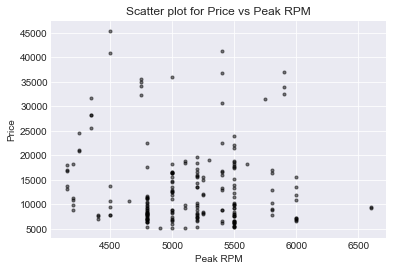

In [189]:
# Scatter Plot (Peak RPM vs Price)
scatterPlotForPrice(cardetailsdata.peakrpm,'Peak RPM')

<b>Observation</b> : Peak RPM denotes the power band of an internal combustion engine or electric motor in the range of operating speeds under which the engine or motor is able to operate most efficiently. 

Peak RPM doesn't tell much about the car price. Lets check about this variable in our model

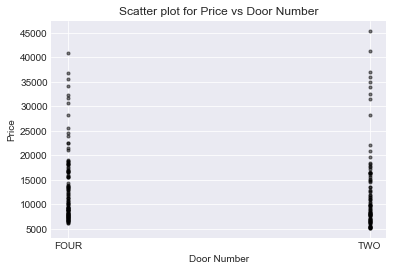

In [190]:
# Scatter Plot (doornumber vs Price)
scatterPlotForPrice(cardetailsdata.doornumber,'Door Number')

<b>Observation</b> : Number of doors doesn't tell much about car price. Lets check if we can ignore this variable in our model

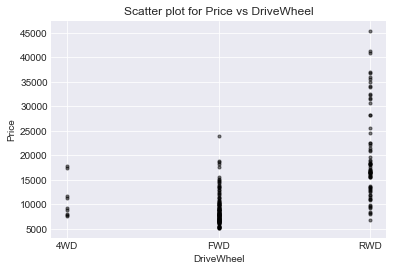

In [191]:
# Scatter Plot (DriveWheel vs Price)
scatterPlotForPrice(cardetailsdata.drivewheel,'DriveWheel')

<b>Observation</b> : Cars with 'rwd' drive wheel are more costlier than the other two.

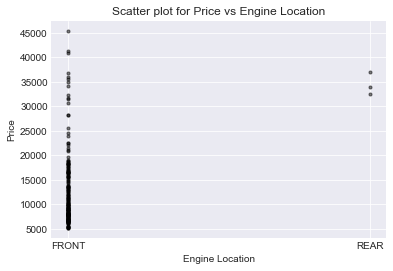

In [192]:
# Scatter Plot (Engine Location vs Price)
scatterPlotForPrice(cardetailsdata.enginelocation,'Engine Location')

<b>Observation</b> : Most of the cars are having front engine. Very few are having rear engine. 

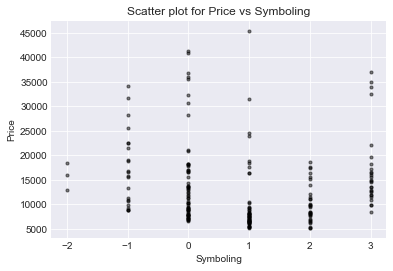

In [193]:
# Scatter Plot (Symboling vs Price)
scatterPlotForPrice(cardetailsdata.symboling,'Symboling')

<b>Observation</b> : Most of the cars have risky insurance rating. Very less cars fall under safe rating. 

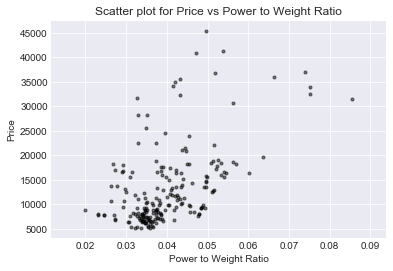

In [194]:
# Scatter Plot (Power to Weight Ratio vs Price)
scatterPlotForPrice(cardetailsdata.power_to_weight_ratio,'Power to Weight Ratio')

<b>Observation</b> : The higher the power to weight ratio number, the better your car is going to be in terms of performance. But neither car meets the golden standard of one horsepower to 10 pounds. Start to reach that number and you’re getting into some truly sporty cars which are definitely pricey.

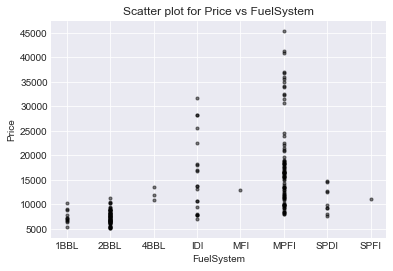

In [195]:
# Scatter Plot (FuelSystem vs Price)
scatterPlotForPrice(cardetailsdata.fuelsystem,'FuelSystem')

<b>Observation</b> : Cars with FuelSystem 'mpfi' and 'idi' look pricey.

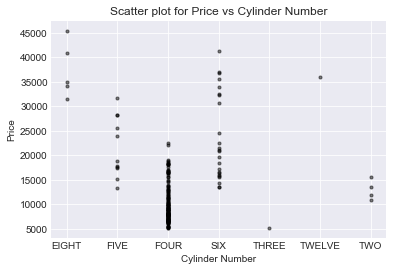

In [196]:
# Scatter Plot (Cylinder Number vs Price)
scatterPlotForPrice(cardetailsdata.cylindernumber,'Cylinder Number')

<b>Observation</b> : Most of the Cars have four Cylinders. Cars with eight and six cylinders look pricey.

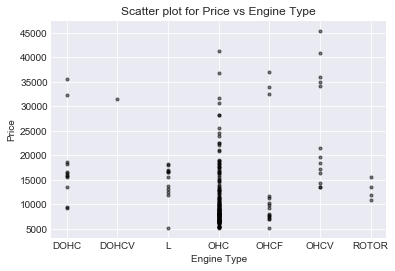

In [197]:
# Scatter Plot (Engine Type vs Price)
scatterPlotForPrice(cardetailsdata.enginetype,'Engine Type')

<b>Observation</b> : Cars with ohc and ohcv engine type are costlier than others. Most of the cars that have ohc engine type are in the price range of 5000 - 20000 dollars

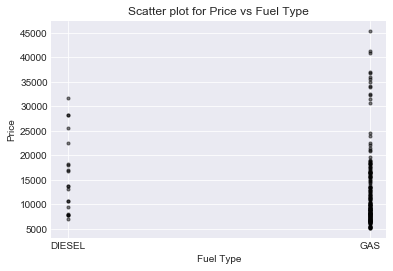

In [198]:
# Scatter Plot (Fuel Type vs Price)
scatterPlotForPrice(cardetailsdata.fueltype,'Fuel Type')

<b>Observation</b> : Cars with gas have high prices than those that of diesel.Also there are many cars with gas fuel type than diesel fuel type.

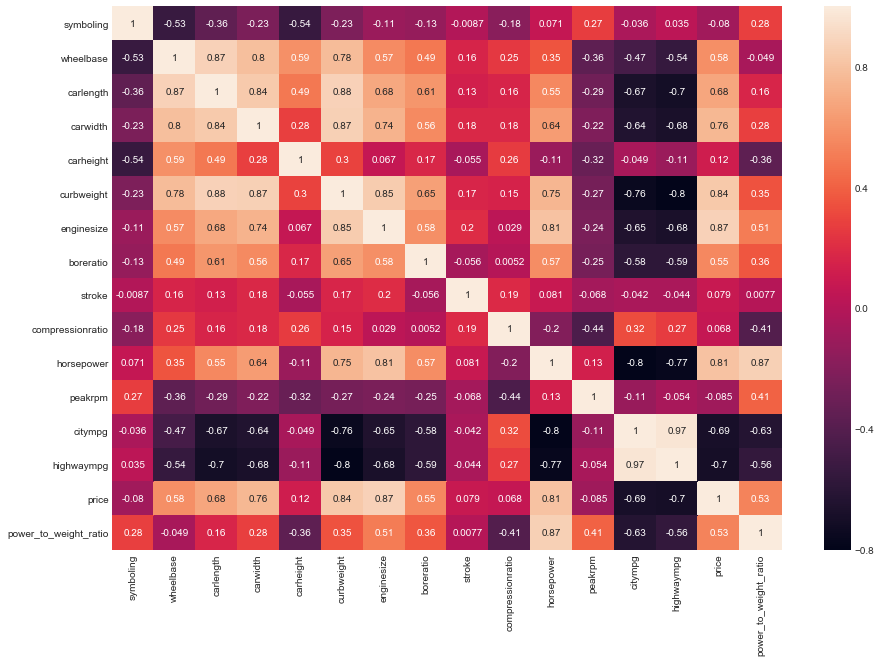

In [199]:
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(cardetailsdata.corr(),annot = True)

 ### Observations : 
 
  - Highly correlated columns are citympg and highwaympg with 0.97 correlation.    
  - wheelbase, carlength, carwidth, curbweight and length_to_width_ratio are highly correlated
  - curbweight is correlated with engine size
  - enginesize is correlated with horsepower
  - horsepower is correlated with curbweight and power_to_weight_ratio
    
  - The dependant column price is correlated with horsepower, carwidth, enginesize, curbweight. 
  
  We will not be dropping any of the columns now. Lets check further the impact of these columns while building the model. 

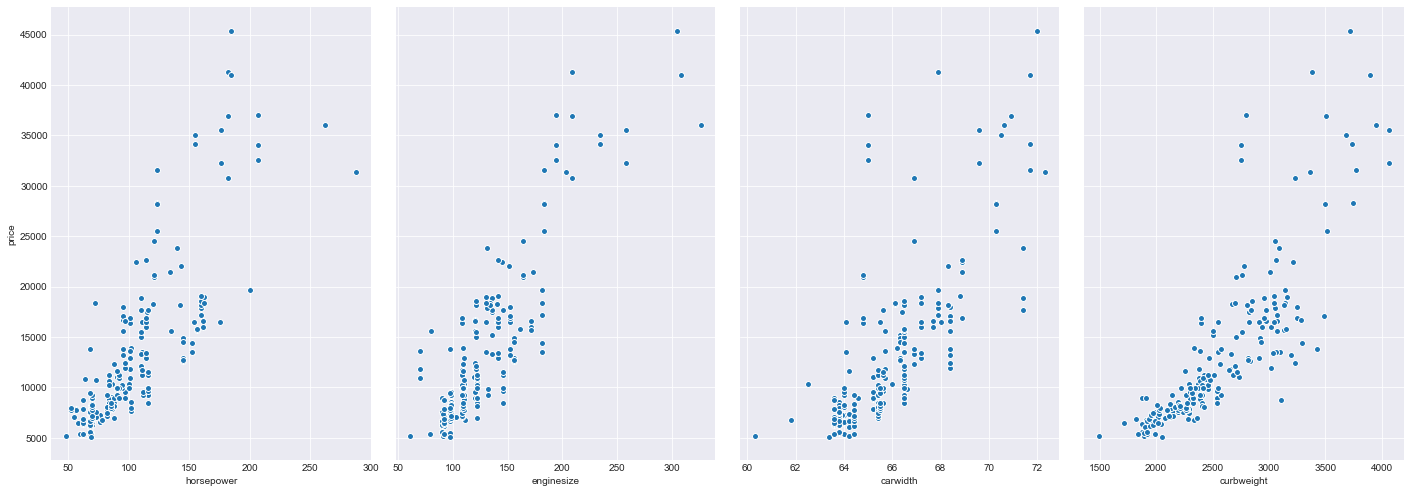

In [200]:
# Visualise the relationship between the features and the price variable using scatterplots
sns.pairplot(cardetailsdata, x_vars=['horsepower','enginesize','carwidth','curbweight'], y_vars='price', size=7, aspect=0.7, kind='scatter')

 ### Observations :
 
 - Only enginesize and horsepower show similar variation with price but others are showing different variations with respect to price
 - So not dropping any of these columns. We will consider them in our further analysis

 ## Converting Categorical variables to numeric variables for Linear Regression Analysis

In [201]:
#Checking Categorical Columns - fueltype, aspiration, doornumber, enginelocation, cylindernumber

#fueltype
print(cardetailsdata.fueltype.value_counts())
#Converting gas to 1 and diesel to 0
cardetailsdata['fueltype'] = cardetailsdata['fueltype'].map({'GAS': 1, 'DIESEL': 0})

#aspiration
print(cardetailsdata.aspiration.value_counts())
#Converting std to 1 and turbo to 0
cardetailsdata['aspiration'] = cardetailsdata['aspiration'].map({'STD': 1, 'TURBO': 0})

#doornumber
print(cardetailsdata.doornumber.value_counts())
#Converting four to 1 and two to 0
cardetailsdata['doornumber'] = cardetailsdata['doornumber'].map({'FOUR': 1, 'TWO': 0})

#enginelocation
print(cardetailsdata.enginelocation.value_counts())
#Converting front to 1 and rear to 0
cardetailsdata['enginelocation'] = cardetailsdata['enginelocation'].map({'FRONT': 1, 'REAR': 0})

#cylindernumber
print(cardetailsdata.cylindernumber.value_counts())
cardetailsdata['cylindernumber'] = cardetailsdata['cylindernumber'].map({"FOUR": 4, "SIX": 6, "FIVE": 5, "EIGHT": 8,
                                  "TWO": 2, "TWELVE": 12, "THREE":3})

GAS       185
DIESEL     20
Name: fueltype, dtype: int64
STD      168
TURBO     37
Name: aspiration, dtype: int64
FOUR    115
TWO      90
Name: doornumber, dtype: int64
FRONT    202
REAR       3
Name: enginelocation, dtype: int64
FOUR      159
SIX        24
FIVE       11
EIGHT       5
TWO         4
TWELVE      1
THREE       1
Name: cylindernumber, dtype: int64


 ### Creating dummy variables for the below columns

In [202]:
#CarName
print(cardetailsdata.CarName.value_counts())
#symboling
print(cardetailsdata.symboling.value_counts())
#carbody
print(cardetailsdata.carbody.value_counts())
#drivewheel
print(cardetailsdata.drivewheel.value_counts())
#fuelsystem
print(cardetailsdata.fuelsystem.value_counts())
#enginetype
print(cardetailsdata.enginetype.value_counts())

TOYOTA         32
NISSAN         18
MAZDA          17
HONDA          13
MITSUBISHI     13
VOLKSWAGEN     12
SUBARU         12
VOLVO          11
PEUGEOT        11
DODGE           9
BMW             8
BUICK           8
AUDI            7
PLYMOUTH        7
SAAB            6
PORSCHE         5
ISUZU           4
JAGUAR          3
CHEVROLET       3
ALFA-ROMERO     3
RENAULT         2
MERCURY         1
Name: CarName, dtype: int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
SEDAN          96
HATCHBACK      70
WAGON          25
HARDTOP         8
CONVERTIBLE     6
Name: carbody, dtype: int64
FWD    120
RWD     76
4WD      9
Name: drivewheel, dtype: int64
MPFI    94
2BBL    66
IDI     20
1BBL    11
SPDI     9
4BBL     3
MFI      1
SPFI     1
Name: fuelsystem, dtype: int64
OHC      148
OHCF      15
OHCV      13
L         12
DOHC      12
ROTOR      4
DOHCV      1
Name: enginetype, dtype: int64


In [203]:
# Creating a list of columns for which dummy variables needs to be created
dummyVarColumns = ['CarName','carbody','drivewheel','fuelsystem','enginetype']
# Creating dummy variable for above columns and dropping the first created dummy one for each of them
dummyVar = pd.get_dummies(cardetailsdata[dummyVarColumns],drop_first=True)
symboling = pd.get_dummies(cardetailsdata['symboling'],drop_first=True)
dummyVar.head(5)

,CarName_AUDI,CarName_BMW,CarName_BUICK,CarName_CHEVROLET,CarName_DODGE,CarName_HONDA,CarName_ISUZU,CarName_JAGUAR,CarName_MAZDA,CarName_MERCURY,...,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [204]:
#Adding the results to the EDA dataframe
cardetailsdata = pd.concat([cardetailsdata,dummyVar,symboling],axis=1)

In [205]:
# Dropping the categorical variables
cardetailsdata.drop(columns=dummyVarColumns,axis=1,inplace=True)
cardetailsdata.drop('symboling', axis=1, inplace=True)

In [206]:
cardetailsdata.columns

Index([             'fueltype',            'aspiration',
                  'doornumber',        'enginelocation',
                   'wheelbase',             'carlength',
                    'carwidth',             'carheight',
                  'curbweight',        'cylindernumber',
                  'enginesize',             'boreratio',
                      'stroke',      'compressionratio',
                  'horsepower',               'peakrpm',
                     'citympg',            'highwaympg',
                       'price', 'power_to_weight_ratio',
                'CarName_AUDI',           'CarName_BMW',
               'CarName_BUICK',     'CarName_CHEVROLET',
               'CarName_DODGE',         'CarName_HONDA',
               'CarName_ISUZU',        'CarName_JAGUAR',
               'CarName_MAZDA',       'CarName_MERCURY',
          'CarName_MITSUBISHI',        'CarName_NISSAN',
             'CarName_PEUGEOT',      'CarName_PLYMOUTH',
             'CarName_PORSCHE',

In [207]:
cardetailsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
cylindernumber           205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
power_to_weight_ratio    205 non-null float

### Rescaling the Variables 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are two ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [208]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                    
# applying normalize function to only independent variables
cardetailsdata = cardetailsdata.apply(normalize) 

In [209]:
#Check number of rows and columns of cardetailsdata
cardetailsdata.shape

(205, 65)

 ## EDA Analysis Conclusion:
 
 1. Derived new columns CompanyName and Power to Weight Ratio
 - No missing values and duplicate values in dataset
 - Dropped Car ID column as it will not be useful in our further analysis
 - Standardized all String column values by converting them to Uppercase
 - Converted Categorical variables to numeric variables to support Linear Regression Analysis
 - Rescaled the variables by applying normalize function
 - Corrected Spelling mistakes in Car Name column
 - Univariate and Bivariate Analysis by plotting graphs

## Step_3: Splitting data into training and testing sets

In [210]:
# Putting feature variable to X
X = cardetailsdata[[             'fueltype',            'aspiration',
                  'doornumber',        'enginelocation',
                   'wheelbase',             'carlength',
                    'carwidth',             'carheight',
                  'curbweight',        'cylindernumber',
                  'enginesize',             'boreratio',
                      'stroke',      'compressionratio',
                  'horsepower',               'peakrpm',
                     'citympg',            'highwaympg',
                       'power_to_weight_ratio',
                'CarName_AUDI',           'CarName_BMW',
               'CarName_BUICK',     'CarName_CHEVROLET',
               'CarName_DODGE',         'CarName_HONDA',
               'CarName_ISUZU',        'CarName_JAGUAR',
               'CarName_MAZDA',       'CarName_MERCURY',
          'CarName_MITSUBISHI',        'CarName_NISSAN',
             'CarName_PEUGEOT',      'CarName_PLYMOUTH',
             'CarName_PORSCHE',       'CarName_RENAULT',
                'CarName_SAAB',        'CarName_SUBARU',
              'CarName_TOYOTA',    'CarName_VOLKSWAGEN',
               'CarName_VOLVO',       'carbody_HARDTOP',
           'carbody_HATCHBACK',         'carbody_SEDAN',
               'carbody_WAGON',        'drivewheel_FWD',
              'drivewheel_RWD',       'fuelsystem_2BBL',
             'fuelsystem_4BBL',        'fuelsystem_IDI',
              'fuelsystem_MFI',       'fuelsystem_MPFI',
             'fuelsystem_SPDI',       'fuelsystem_SPFI',
            'enginetype_DOHCV',          'enginetype_L',
              'enginetype_OHC',       'enginetype_OHCF',
             'enginetype_OHCV',      'enginetype_ROTOR',
                            -1,                       0,
                             1,                       2,
                             3]]
# Putting response variable to y
y = cardetailsdata['price']

In [211]:
#Check number of rows and columns in X - It should contain only independent variables
X.shape

(205, 64)

In [212]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [213]:
# UDF for calculating vif value
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

## Step_4: RFE

In [214]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#RFE Function
lm = LinearRegression()
def RFE_Model_StatsandVIF(varCount,X_train, y_train, print_VIF_flag):
    rfe = RFE(lm, varCount)   # running RFE with no of output variables as varCount
    rfe = rfe.fit(X_train, y_train)  # Finding the best fit model       
    rfe_col = X_train.columns[rfe.support_] #Columns that are selected after eliminating few by RFE
    print(rfe_col)
    print(rfe.ranking_)
    # Creating X_train_rfe dataframe with RFE selected variables
    X_train_rfe = X_train[rfe_col]
    # Building a linear model with training dataset consisting of only RFE selected variables
    lm_rfe = buildlinearmodel(X_train_rfe, y_train, print_VIF_flag)
    return lm_rfe, X_train_rfe

In [215]:
#Check no.of independent variables in the dataset
X.shape

(205, 64)

 ### First build a linear model with all the variables and check R-squared , Adjusted R-squared and VIF values

In [216]:
import statsmodels.api as sm          # Importing statsmodels
def buildlinearmodel(X_train, y_train, print_VIF_flag):
    X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
    # create a first fitted model
    linear_model = sm.OLS(y_train,X_train).fit()
    #If Printing VIF Flag is Yes then print VIF else dont print
    if print_VIF_flag == 'Yes':
        if 'const' in X_train.columns :
            X_train_1 = X_train.drop(columns=['const'],axis=1)
        print(vif_cal(input_data=cardetailsdata[X_train_1.columns]))
    return linear_model

In [217]:
#Let's see the summary of our first linear model without RFE
lm_model = buildlinearmodel(X_train, y_train, 'Yes')
print(lm_model.summary())

C:\Users\Z003XTFN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


                      Var         Vif
0                fueltype         inf
56        enginetype_OHCF         inf
48         fuelsystem_IDI         inf
36         CarName_SUBARU         inf
3          enginelocation         inf
14             horsepower  357.010000
13       compressionratio  190.190000
18  power_to_weight_ratio  187.810000
8              curbweight  123.970000
10             enginesize   69.170000
16                citympg   50.980000
17             highwaympg   43.780000
50        fuelsystem_MPFI   42.410000
31        CarName_PEUGEOT   36.870000
60                      0   34.130000
46        fuelsystem_2BBL   33.160000
61                      1   32.710000
9          cylindernumber   30.370000
54           enginetype_L   24.520000
5               carlength   24.130000
62                      2   23.730000
42          carbody_SEDAN   22.940000
63                      3   22.770000
4               wheelbase   20.510000
45         drivewheel_RWD   20.350000
37         C

 <b>Observation :</b> R-squared value is 0.975 and Adjusted R-square value is 0.957 for All variables

 ### Running RFE with number of output variables equal to  32 columns.

In [218]:
# Running RFE with 32 output variables
lm_rfe1,X_train_rfe1 = RFE_Model_StatsandVIF(32,X_train,y_train,'No')
#Let's see the summary of our linear model
print(lm_rfe1.summary())

Index(['fueltype', 'aspiration', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'compressionratio', 'horsepower', 'peakrpm',
       'power_to_weight_ratio', 'CarName_BMW', 'CarName_BUICK',
       'CarName_MITSUBISHI', 'CarName_PEUGEOT', 'CarName_PLYMOUTH',
       'CarName_PORSCHE', 'CarName_SAAB', 'CarName_SUBARU', 'carbody_HARDTOP',
       'carbody_HATCHBACK', 'carbody_SEDAN', 'carbody_WAGON',
       'fuelsystem_4BBL', 'fuelsystem_IDI', 'enginetype_L', 'enginetype_OHCF',
       'enginetype_ROTOR'],
      dtype='object')
[ 1  1 29  1  1  1  1  1  1  1  1  1 15  1  1  1 14 30  1 12  1  1  7  2
  5 10  6 13 33  1  9  1  1  1  3  1  1 11  8 20  1  1  1  1 27 28 24  1
  1 31 25 23 32  4  1 16  1 26  1 18 21 19 17 22]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                  

<b>Observation</b> : R-squared value is 0.962 and Adjusted R-squared is 0.952 for 32 variables

### Running RFE with number of output variables equal to 20 columns

In [219]:
# Running RFE with the output number of the variable equal to 20
lm_rfe2,X_train_rfe2  = RFE_Model_StatsandVIF(20,X_train,y_train,'No')
#Let's see the summary of our linear model
print(lm_rfe2.summary())

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'power_to_weight_ratio', 'CarName_BMW', 'CarName_BUICK',
       'CarName_PEUGEOT', 'CarName_PORSCHE', 'CarName_SUBARU',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'enginetype_OHCF'],
      dtype='object')
[10  8 41  1  1  1  1  3  1  1  1  1 27 11  1  7 26 42  1 24  1  1 19 14
 17 22 18 25 45 12 21  1 13  1 15  4  1 23 20 32  1  1  1  1 39 40 36  6
  9 43 37 35 44 16  2 28  1 38  5 30 33 31 29 34]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.25e-67
Time:    

<b>Observation :</b> R-squared value is 0.943 and Adjusted R-square value is 0.934 for 20 variables

In [220]:
# Running RFE with the output number of the variable equal to 18
lm_rfe3,X_train_rfe3  = RFE_Model_StatsandVIF(18,X_train,y_train,'Yes')
#Let's see the summary of our linear model
print(lm_rfe3.summary())

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'power_to_weight_ratio', 'CarName_BMW', 'CarName_BUICK',
       'CarName_PORSCHE', 'carbody_HARDTOP', 'carbody_HATCHBACK',
       'carbody_SEDAN', 'carbody_WAGON', 'enginetype_OHCF'],
      dtype='object')
[12 10 43  1  1  1  1  5  1  1  1  1 29 13  1  9 28 44  1 26  1  1 21 16
 19 24 20 27 47 14 23  3 15  1 17  6  2 25 22 34  1  1  1  1 41 42 38  8
 11 45 39 37 46 18  4 30  1 40  7 32 35 33 31 36]
                      Var     Vif
8              horsepower  217.10
9   power_to_weight_ratio  165.67
0          enginelocation  161.10
4              curbweight  136.45
2               carlength   83.69
6              enginesize   64.93
3                carwidth   59.31
5          cylindernumber   53.32
7               boreratio   50.01
1               wheelbase   36.13
15          carbody_SEDAN   23.38
14      carbody_HATCHBACK   15.97
16    

<b>Observation :</b> R-squared value is 0.939 and Adjusted R-squared is 0.93 for 18 variables

 ## RFE Summary :
 
 - For All variables, R-squared value is 0.975 and Adjusted R-squared value is 0.957 
 - For 32 variables, R-squared value is 0.962 and Adjusted R-squared value is 0.952 
 - For 20 variables, R-squared value is 0.943 and Adjusted R-squared value is 0.934
 - For 18 variables, R-squared value is 0.939 and Adjusted R-squared value is 0.93

## Step_5: Building Possible Suitable models

<b> Use p-value, VIF and Correlation matrix to decide on which variable can be removed. Only remove one variable at a time and build model again after removing to check R-square and Adjusted R-squared value. </b>

  - carlength column is having high p-value and high VIF value. Its p-value is 0.258 and VIF is 83.69. So dropping car length column.

                      Var     Vif
7              horsepower  206.20
0          enginelocation  158.59
8   power_to_weight_ratio  156.19
3              curbweight  114.01
5              enginesize   64.91
4          cylindernumber   53.32
2                carwidth   52.83
6               boreratio   48.69
1               wheelbase   32.75
14          carbody_SEDAN   22.84
13      carbody_HATCHBACK   15.97
15          carbody_WAGON    7.00
11        CarName_PORSCHE    2.99
12        carbody_HARDTOP    2.48
16        enginetype_OHCF    2.32
10          CarName_BUICK    1.87
9             CarName_BMW    1.25
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.

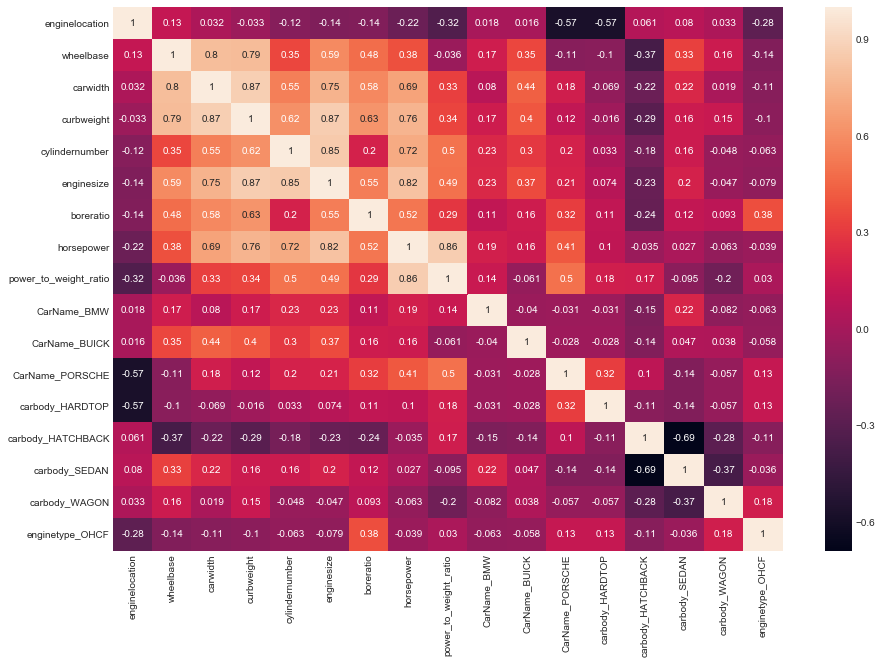

In [221]:
#Drop carlength      
X_train_model1 = X_train_rfe3.drop(columns=['carlength'],axis=1)
#Building Model 1
lm_model1 = buildlinearmodel(X_train_model1, y_train, 'Yes')
print(lm_model1.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model1.corr(),annot = True)

<b>Observation</b> : After dropping carlength column, Adjusted R-squared value remains same at 0.93. This tells us that carlength column doesn't have significance in determining the price.

- wheelbase column is having p-value of 0.088 which is higher than 0.05 and high VIF value of 32.75. So dropping wheelbase column.

                      Var     Vif
6              horsepower  200.49
7   power_to_weight_ratio  155.77
0          enginelocation  148.89
2              curbweight  102.62
4              enginesize   64.84
3          cylindernumber   53.29
5               boreratio   47.50
1                carwidth   41.60
13          carbody_SEDAN   19.25
12      carbody_HATCHBACK   14.49
14          carbody_WAGON    5.94
10        CarName_PORSCHE    2.81
11        carbody_HARDTOP    2.35
15        enginetype_OHCF    2.24
9           CarName_BUICK    1.87
8             CarName_BMW    1.22
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.56e-67
Time:                      

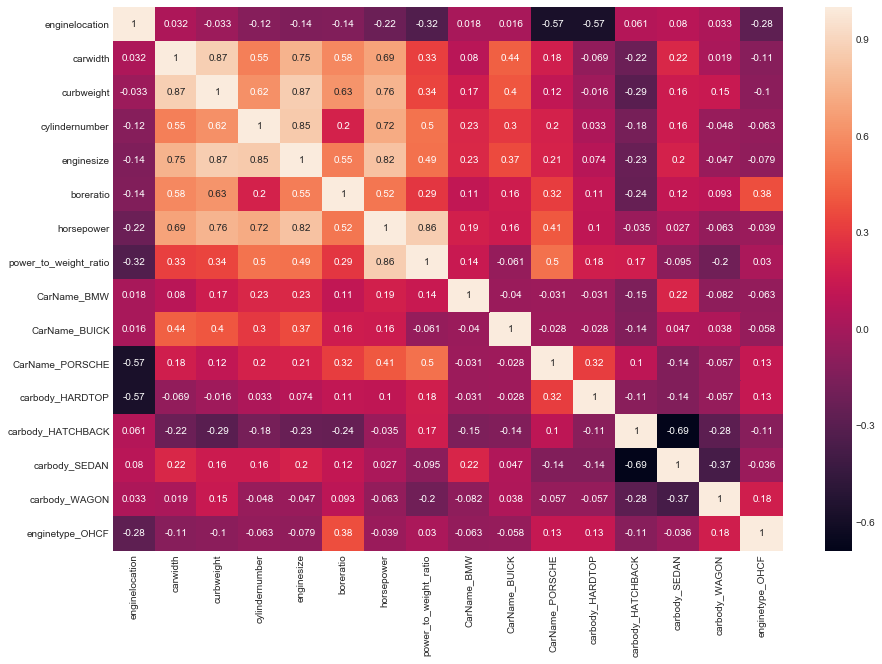

In [222]:
#Drop wheelbase                       
X_train_model2 = X_train_model1.drop(columns=['wheelbase'],axis=1)
#Building Model 2
lm_model2 = buildlinearmodel(X_train_model2, y_train, 'Yes')
print(lm_model2.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model2.corr(),annot = True)

<b>Observation</b> : After dropping wheelbase column, Adjusted R-squared value remains at 0.929. There is no drastic fall in Adjusted R-square value. The variation is very minimal. This tells us that wheelbase column doesn't have much significance in determining the price.

- curbweight column is having p-value of 0.103 which is higher than 0.05 and high VIF value of 102.62. So dropping curbweight column.

                      Var     Vif
0          enginelocation  112.77
5              horsepower  100.36
6   power_to_weight_ratio   86.83
3              enginesize   59.82
2          cylindernumber   48.73
4               boreratio   47.50
1                carwidth   37.69
12          carbody_SEDAN   19.11
11      carbody_HATCHBACK   14.48
13          carbody_WAGON    5.72
9         CarName_PORSCHE    2.71
10        carbody_HARDTOP    2.33
14        enginetype_OHCF    2.21
8           CarName_BUICK    1.86
7             CarName_BMW    1.22
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     122.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.54e-68
Time:                        22:42:02   Log-Likelihood:      

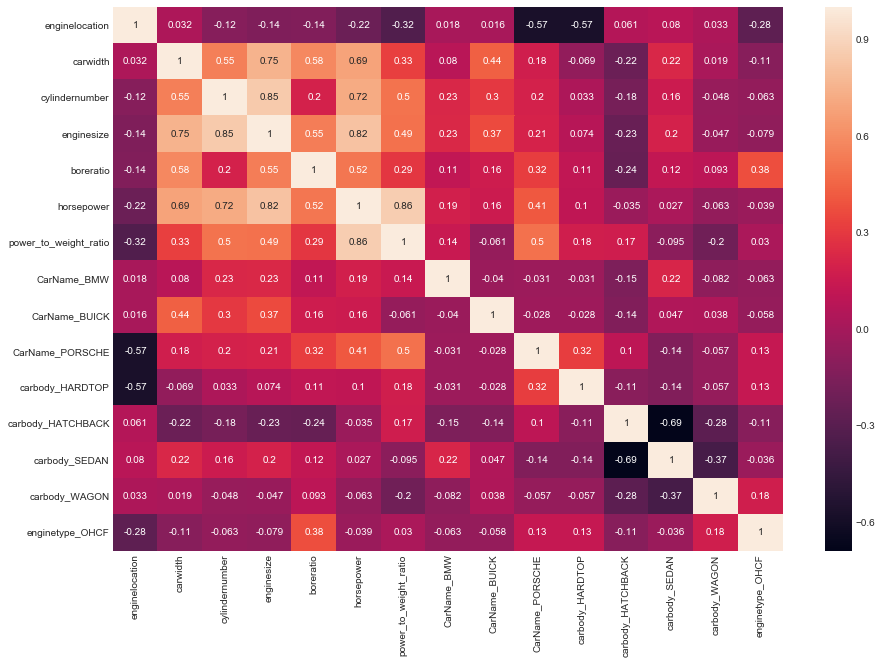

In [223]:
##Drop curbweight         
X_train_model3 = X_train_model2.drop(columns=['curbweight'],axis=1)
#Building Model 3
lm_model3 = buildlinearmodel(X_train_model3, y_train, 'Yes')
print(lm_model3.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model3.corr(),annot = True)

<b>Observation</b> : After dropping curbweight column, Adjusted R-squared value remains at 0.928. There is no drastic fall in Adjusted R-square value. The variation is very minimal. This tells us that curbweight column doesn't have much significance in determining the price.

- enginelocation column is having high VIF value of 112.77. It says that it is highly multi-collinear with other columns in the current model. So dropping enginelocation column.

                      Var    Vif
4              horsepower  70.96
5   power_to_weight_ratio  62.97
2              enginesize  56.79
1          cylindernumber  35.93
0                carwidth  32.56
3               boreratio  29.39
11          carbody_SEDAN  15.24
10      carbody_HATCHBACK  10.87
12          carbody_WAGON   4.31
9         carbody_HARDTOP   2.24
7           CarName_BUICK   1.86
13        enginetype_OHCF   1.71
8         CarName_PORSCHE   1.69
6             CarName_BMW   1.21
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.44e-66
Time:                        22:42:06   Log-Likelihood:                 222.01
No. Observations:              

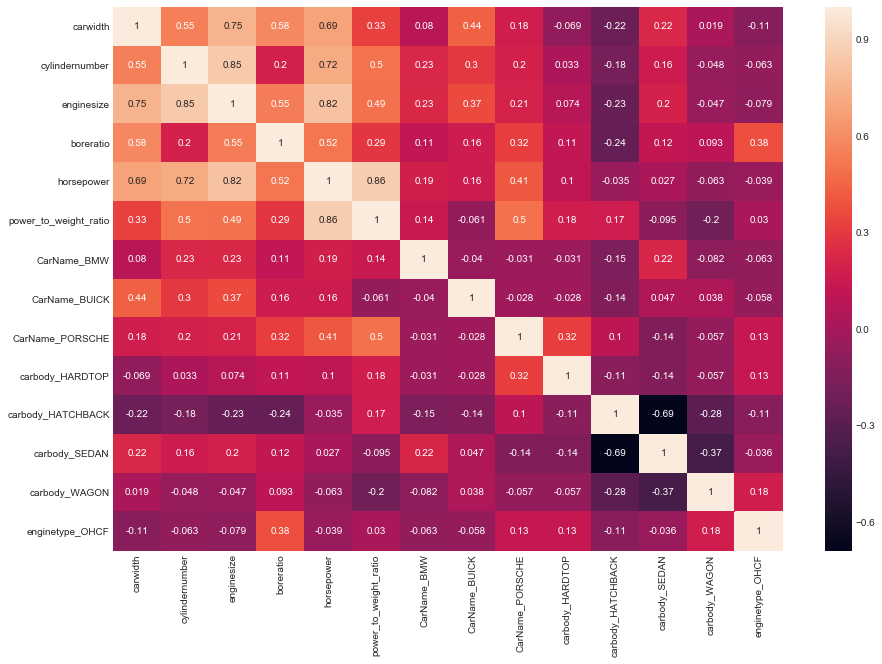

In [224]:
#Drop enginelocation             
X_train_model4 = X_train_model3.drop(columns=['enginelocation'],axis=1)
#Building Model 4
lm_model4 = buildlinearmodel(X_train_model4, y_train, 'Yes')
print(lm_model4.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model4.corr(),annot = True)

<b>Observation</b> : After dropping enginelocation column, Adjusted R-squared value remains at 0.922. There is no drastic fall in Adjusted R-square value. The variation is very minimal. This tells us that enginelocation column doesn't have much significance in determining the price. Even if it has, since its multi-collinear with other variables the effect on price can be determined from other variables.

- horsepower is having VIF value of 70.96 and power_to_weight_ratio column VIF value of 62.97. From the correlation matrix, we can see that they are correlated with 0.86 correlation ratio.So dropping one of them.

                  Var    Vif
2          enginesize  38.90
1      cylindernumber  29.71
0            carwidth  26.52
3           boreratio  25.99
4          horsepower  13.66
10      carbody_SEDAN  11.68
9   carbody_HATCHBACK   7.30
11      carbody_WAGON   3.95
6       CarName_BUICK   1.85
8     carbody_HARDTOP   1.71
12    enginetype_OHCF   1.71
7     CarName_PORSCHE   1.66
5         CarName_BMW   1.21
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.19e-62
Time:                        22:42:10   Log-Likelihood:                 208.09
No. Observations:                 143   AIC:                            -388.2
Df Residuals:                     129   B

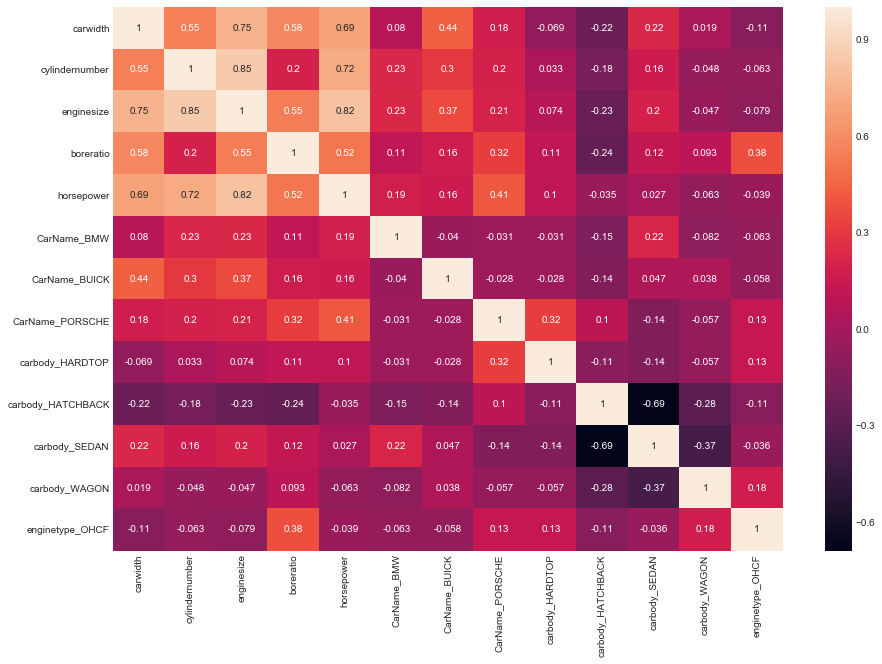

In [225]:
#Drop power_to_weight_ratio          
X_train_model5 = X_train_model4.drop(columns=['power_to_weight_ratio'],axis=1)
#Building Model 5
lm_model5 = buildlinearmodel(X_train_model5, y_train, 'Yes')
print(lm_model5.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model5.corr(),annot = True)

<b>Observation</b> : We tried dropping power_to_weight_ratio and horsepower column separately and checked R-square and Adjusted R-square value.

After dropping horsepower column, Adjusted R-square reduced drastically by 0.028. So we chose to drop power_to_weight_ratio column since Adjusted R-square declined only by 0.016. The variation of dropping cylindernumber column is very minimal.

- carwidth is having VIF value of 26.52 and also is correlated with other columns.So dropping carwidth column.

                  Var    Vif
1          enginesize  38.20
0      cylindernumber  29.70
2           boreratio  22.89
3          horsepower  12.81
9       carbody_SEDAN  10.02
8   carbody_HATCHBACK   6.59
10      carbody_WAGON   3.48
7     carbody_HARDTOP   1.70
6     CarName_PORSCHE   1.66
5       CarName_BUICK   1.63
11    enginetype_OHCF   1.58
4         CarName_BMW   1.16
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     85.37
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.51e-55
Time:                        22:42:13   Log-Likelihood:                 188.38
No. Observations:                 143   AIC:                            -350.8
Df Residuals:                     130   BIC:                          

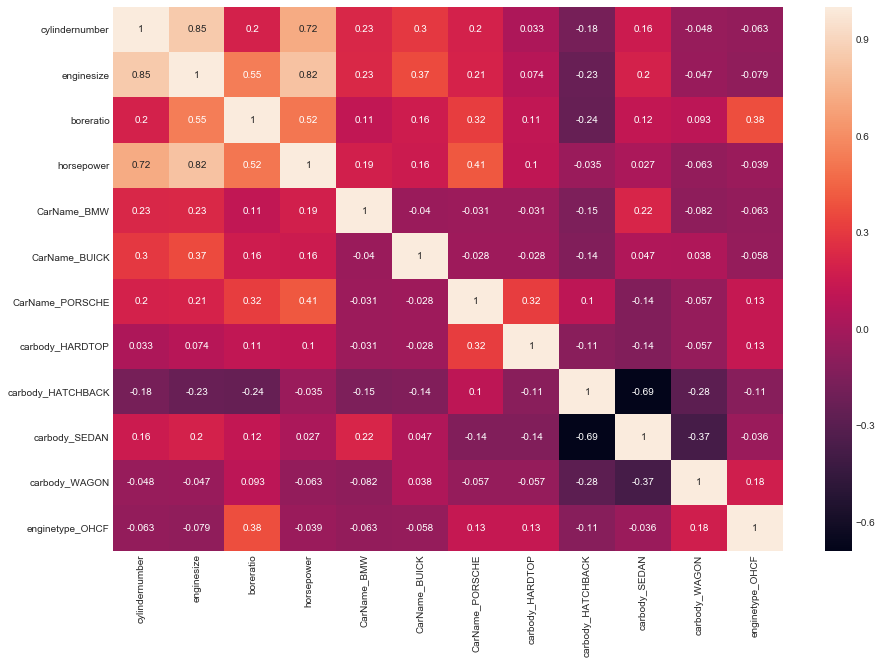

In [226]:
#Drop carwidth              
X_train_model6 = X_train_model5.drop(columns=['carwidth'],axis=1)
#Building Model 6
lm_model6 = buildlinearmodel(X_train_model6, y_train, 'Yes')
print(lm_model6.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model6.corr(),annot = True)

<b>Observation</b> : After dropping carwidth column, Adjusted R-square is 0.877.

- carbody_SEDAN is having VIF value of 10.02 and p-value of 0.501.So dropping it.

                  Var    Vif
1          enginesize  29.48
0      cylindernumber  14.48
3          horsepower  12.49
2           boreratio   8.51
8   carbody_HATCHBACK   1.71
5       CarName_BUICK   1.60
6     CarName_PORSCHE   1.56
10    enginetype_OHCF   1.43
9       carbody_WAGON   1.30
7     carbody_HARDTOP   1.27
4         CarName_BMW   1.16
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     93.48
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.91e-56
Time:                        22:42:16   Log-Likelihood:                 188.13
No. Observations:                 143   AIC:                            -352.3
Df Residuals:                     131   BIC:                            -316.7
Df Model:           

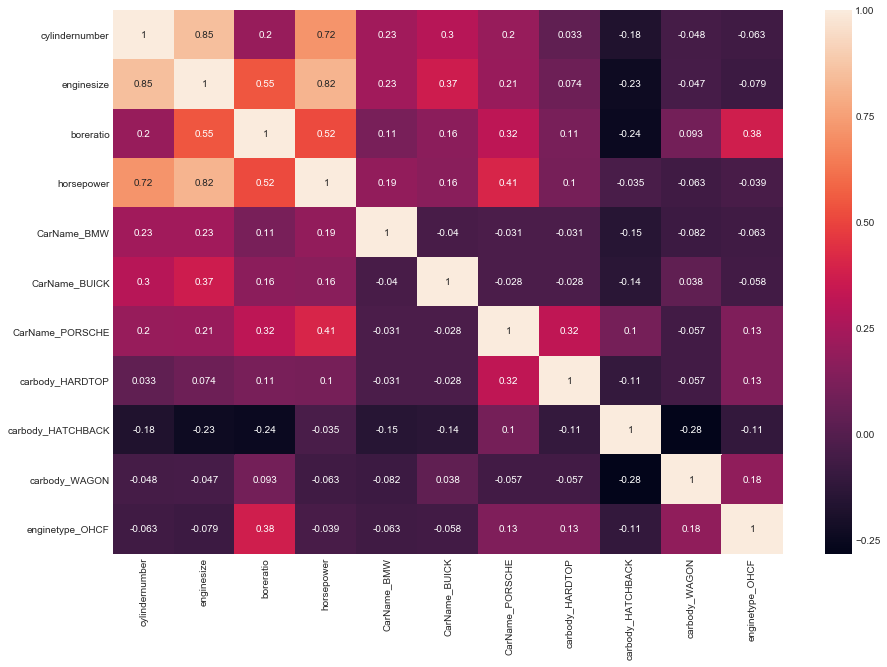

In [227]:
#Drop carbody_SEDAN              
X_train_model7 = X_train_model6.drop(columns=['carbody_SEDAN'],axis=1)
#Building Model 7
lm_model7 = buildlinearmodel(X_train_model7, y_train, 'Yes')
print(lm_model7.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model7.corr(),annot = True)

<b>Observation</b> : After dropping carbody_SEDAN column, Adjusted R-square improved by 0.001

- enginesize is having VIF value of 29.48 and cylindernumber column VIF value of 14.48. From the correlation matrix, we can see that they are correlated with 0.85 correlation ratio.So dropping one of them.

                 Var    Vif
0         enginesize  16.79
2         horsepower  12.47
1          boreratio   8.51
4      CarName_BUICK   1.57
5    CarName_PORSCHE   1.56
7  carbody_HATCHBACK   1.56
9    enginetype_OHCF   1.41
8      carbody_WAGON   1.28
6    carbody_HARDTOP   1.26
3        CarName_BMW   1.16
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     90.86
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.53e-54
Time:                        22:42:18   Log-Likelihood:                 179.87
No. Observations:                 143   AIC:                            -337.7
Df Residuals:                     132   BIC:                            -305.1
Df Model:                          10                       

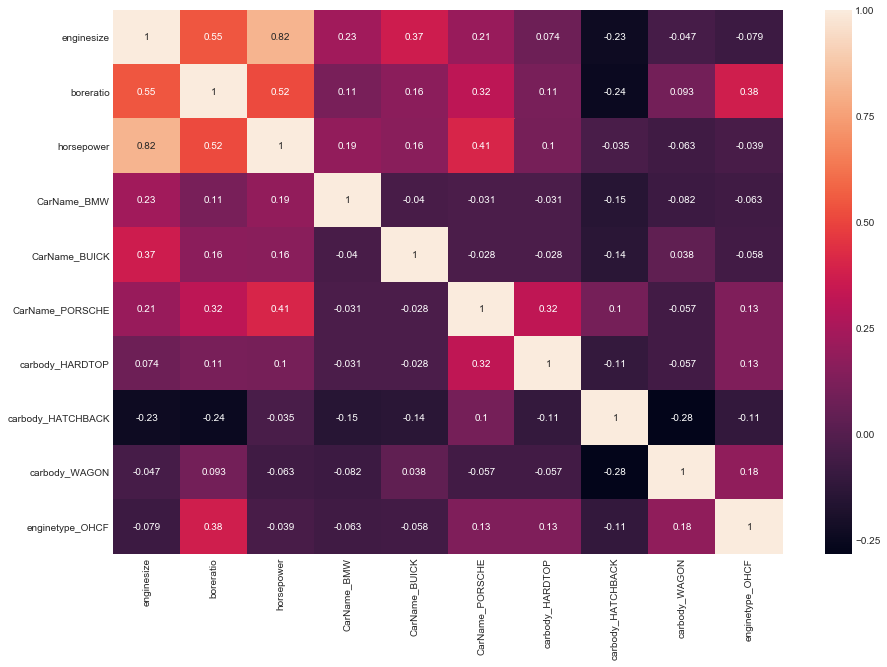

In [228]:
#Drop cylindernumber                                  
X_train_model8 = X_train_model7.drop(columns=['cylindernumber'],axis=1)
#Building Model 8
lm_model8 = buildlinearmodel(X_train_model8, y_train, 'Yes')
print(lm_model8.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model8.corr(),annot = True)

<b>Observation</b> : We tried dropping enginesize and cylindernumber column separately and checked R-square and Adjusted R-square value.

After dropping enginesize column, Adjusted R-square is 0.83. After dropping cylindernumber it is 0.864 column. So we chose to drop cylindernumber column.

- boreratio column is having high p-value. So we will be dropping boreratio column.

                 Var    Vif
0         enginesize  12.63
1         horsepower  12.31
4    CarName_PORSCHE   1.53
3      CarName_BUICK   1.50
6  carbody_HATCHBACK   1.39
5    carbody_HARDTOP   1.25
8    enginetype_OHCF   1.22
7      carbody_WAGON   1.19
2        CarName_BMW   1.16
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     99.99
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.13e-55
Time:                        22:42:20   Log-Likelihood:                 178.80
No. Observations:                 143   AIC:                            -337.6
Df Residuals:                     133   BIC:                            -308.0
Df Model:                           9                                         
Covarianc

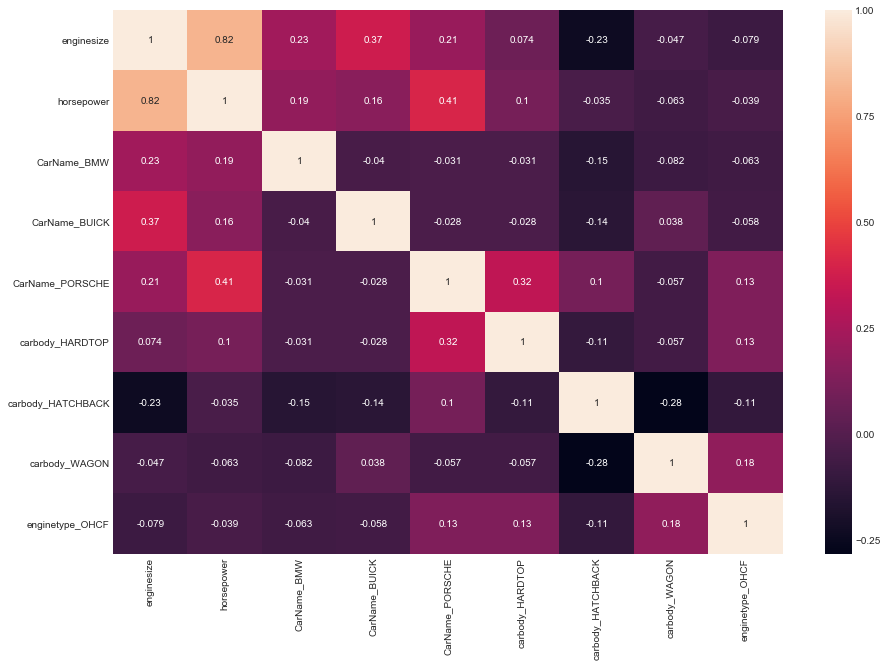

In [229]:
#Drop boreratio                                 
X_train_model9 = X_train_model8.drop(columns=['boreratio'],axis=1)
#Building Model 9
lm_model9 = buildlinearmodel(X_train_model9, y_train, 'Yes')
print(lm_model9.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model9.corr(),annot = True)

<b>Observation</b> : After dropping boreratio column, Adjusted R-squared value decreased by 0.001.

 - enginesize and horsepower are correlated with each other with high VIF values. So dropping one of them.

                 Var   Vif
0         horsepower  2.11
3    CarName_PORSCHE  1.41
5  carbody_HATCHBACK  1.39
4    carbody_HARDTOP  1.24
7    enginetype_OHCF  1.21
2      CarName_BUICK  1.20
6      carbody_WAGON  1.17
1        CarName_BMW  1.14
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     86.25
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.57e-49
Time:                        22:42:22   Log-Likelihood:                 162.11
No. Observations:                 143   AIC:                            -306.2
Df Residuals:                     134   BIC:                            -279.5
Df Model:                           8                                         
Covariance Type:            nonrobust         

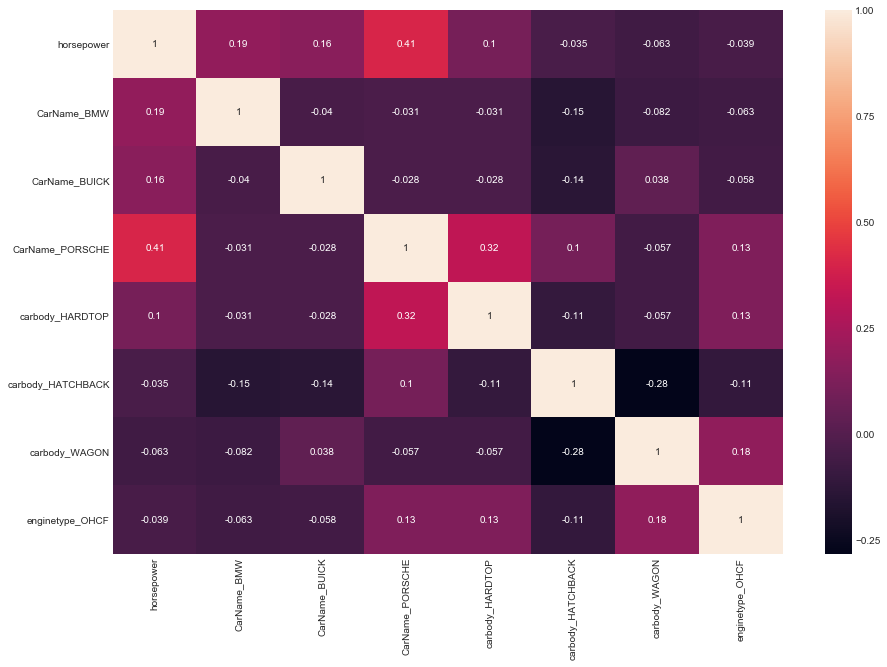

In [230]:
#Drop enginesize                 
X_train_model10 = X_train_model9.drop(columns=['enginesize'],axis=1)
#Building Model 10
lm_model10 = buildlinearmodel(X_train_model10, y_train, 'Yes')
print(lm_model10.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model10.corr(),annot = True)

<b>Observation</b> : After dropping enginesize column and horsepower column separately, Adjusted R-squared value remains at almost same. We can actually build two models from here with one mdoel having enginesize and another having horsepower.

<b>Lets start building one model with horsepower

 - carbody_HARDTOP is having high. So dropping carbody_HARDTOP column

                 Var   Vif
0         horsepower  2.06
4  carbody_HATCHBACK  1.37
3    CarName_PORSCHE  1.34
6    enginetype_OHCF  1.21
5      carbody_WAGON  1.16
2      CarName_BUICK  1.15
1        CarName_BMW  1.14
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     99.31
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.41e-50
Time:                        22:42:24   Log-Likelihood:                 162.11
No. Observations:                 143   AIC:                            -308.2
Df Residuals:                     135   BIC:                            -284.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                    

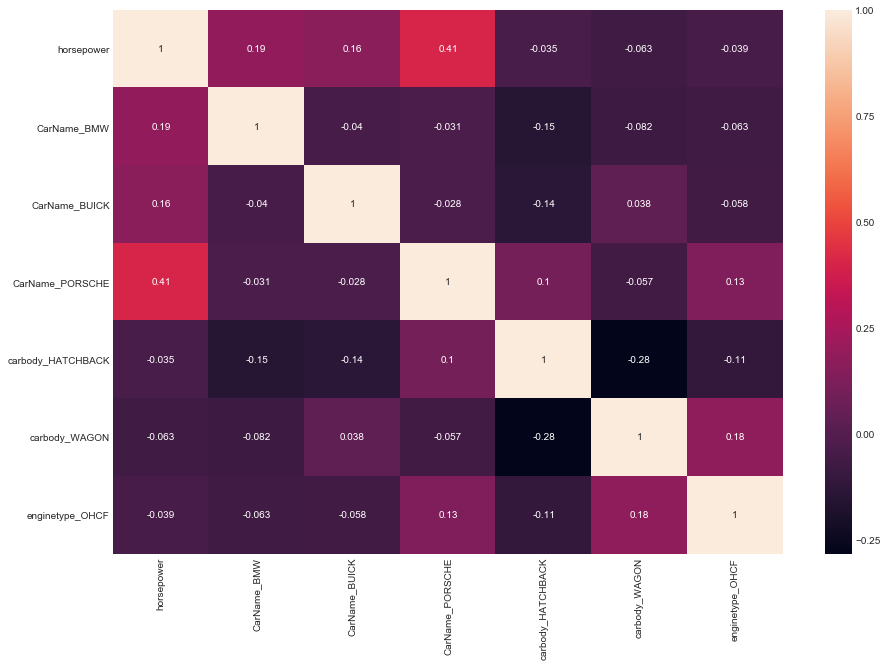

In [231]:
#Drop carbody_HARDTOP                        
X_train_model11 = X_train_model10.drop(columns=['carbody_HARDTOP'],axis=1)
#Building Model 11
lm_model11 = buildlinearmodel(X_train_model11, y_train, 'Yes')
print(lm_model11.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model11.corr(),annot = True)

<b>Observation</b> : After dropping stroke column, Adjusted R-squared value remains at 0.829.

 - carbody_WAGON is having p-value. So dropping this column.

                 Var   Vif
0         horsepower  1.88
4  carbody_HATCHBACK  1.33
3    CarName_PORSCHE  1.30
5    enginetype_OHCF  1.16
2      CarName_BUICK  1.15
1        CarName_BMW  1.13
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.57e-51
Time:                        22:42:25   Log-Likelihood:                 161.56
No. Observations:                 143   AIC:                            -309.1
Df Residuals:                     136   BIC:                            -288.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     

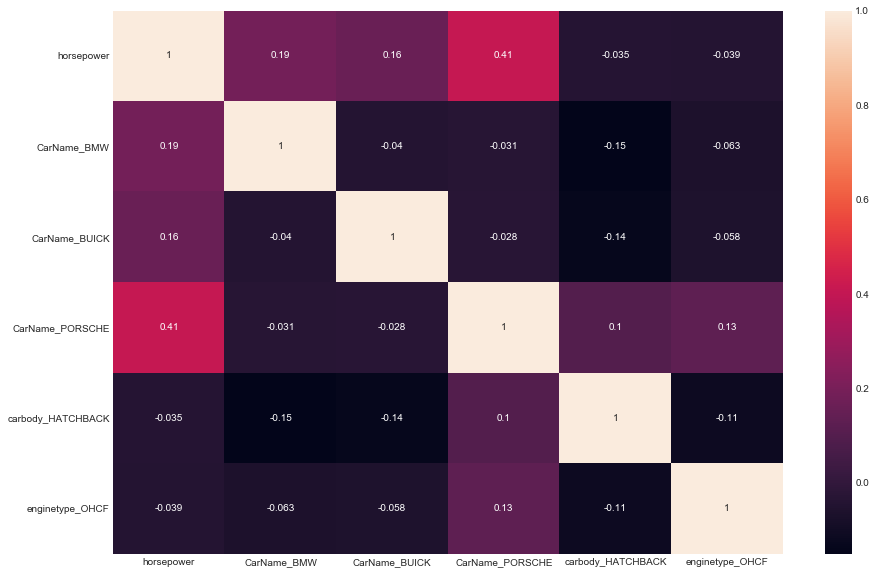

In [232]:
#Drop carbody_WAGON                                    
X_train_model12 = X_train_model11.drop(columns=['carbody_WAGON'],axis=1)
#Building Model 12
lm_model12 = buildlinearmodel(X_train_model12, y_train, 'Yes')
print(lm_model12.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model12.corr(),annot = True)

<b>Observation</b> : After dropping carbody_WAGON column, Adjusted R-squared value remains at 0.829.

 - enginetype_OHCF is having p-value > 0.05. So dropping it.

                 Var   Vif
0         horsepower  1.85
4  carbody_HATCHBACK  1.33
3    CarName_PORSCHE  1.21
2      CarName_BUICK  1.15
1        CarName_BMW  1.13
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.94e-51
Time:                        22:42:26   Log-Likelihood:                 160.19
No. Observations:                 143   AIC:                            -308.4
Df Residuals:                     137   BIC:                            -290.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

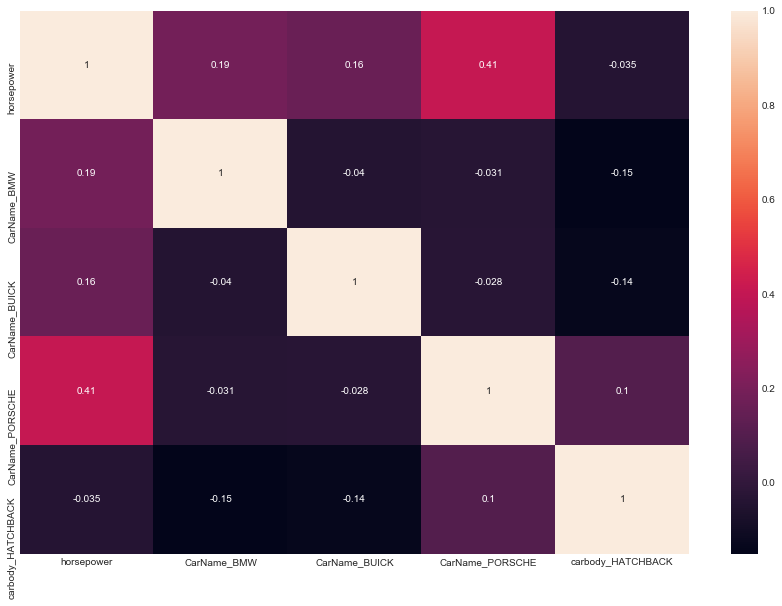

In [233]:
#Drop enginetype_OHCF                                           
X_train_model13 = X_train_model12.drop(columns=['enginetype_OHCF'],axis=1)
#Building Model 13
lm_model13 = buildlinearmodel(X_train_model13, y_train, 'Yes')
print(lm_model13.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model13.corr(),annot = True)

<b>Observation</b> : After dropping enginetype_OHCF column, Adjusted R-square is 0.827.

- CarName_PORSCHE is having p-value > 0.05. So dropping it.

                 Var   Vif
0         horsepower  1.55
3  carbody_HATCHBACK  1.32
2      CarName_BUICK  1.12
1        CarName_BMW  1.11
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     168.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.92e-52
Time:                        22:42:27   Log-Likelihood:                 159.11
No. Observations:                 143   AIC:                            -308.2
Df Residuals:                     138   BIC:                            -293.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025  

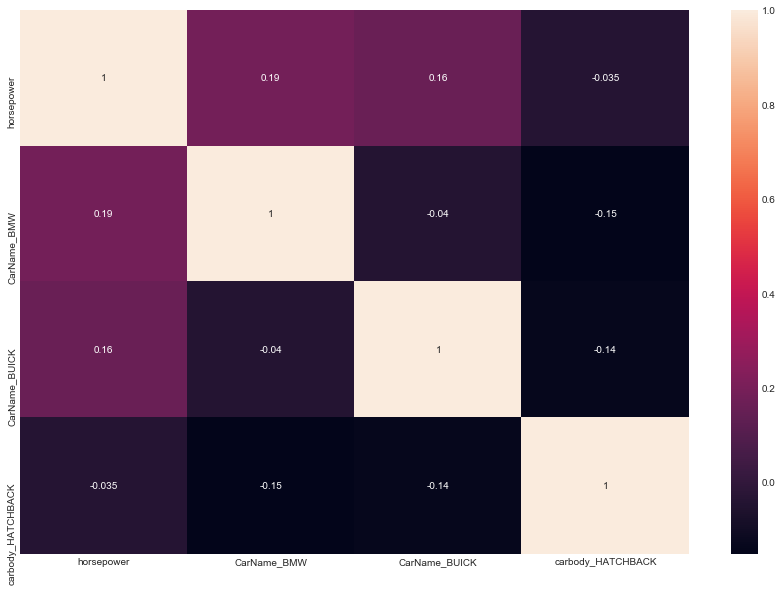

In [234]:
#Drop CarName_PORSCHE                                     
X_train_model14 = X_train_model13.drop(columns=['CarName_PORSCHE'],axis=1)
#Building Model 14
lm_model14 = buildlinearmodel(X_train_model14, y_train, 'Yes')
print(lm_model14.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model14.corr(),annot = True)

<b>Observation</b> : After dropping CarName_PORSCHE, Adjusted R-square is 0.826. 

### Model 14 is looking good with VIF < 2 and p values almost equal to 0

This model considered horsepower. Next model we will build based on enginesize and we will compare both by using Prediction model at the end.

                 Var   Vif
0         enginesize  2.17
2      CarName_BUICK  1.37
5  carbody_HATCHBACK  1.33
3    CarName_PORSCHE  1.30
4    carbody_HARDTOP  1.25
7    enginetype_OHCF  1.22
6      carbody_WAGON  1.19
1        CarName_BMW  1.16
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     87.06
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.71e-49
Time:                        22:42:27   Log-Likelihood:                 162.67
No. Observations:                 143   AIC:                            -307.3
Df Residuals:                     134   BIC:                            -280.7
Df Model:                           8                                         
Covariance Type:            nonrobust         

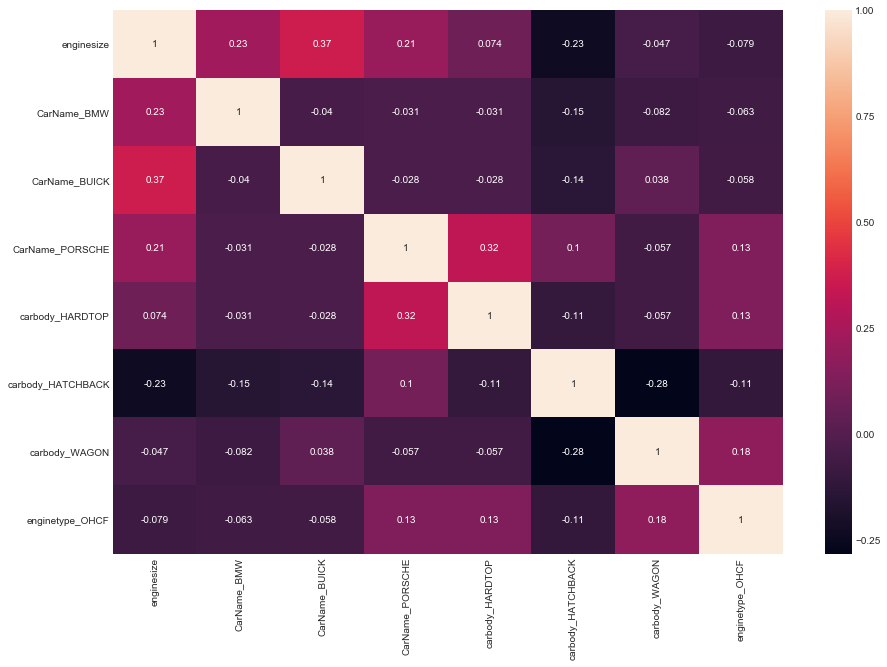

In [235]:
#Drop horsepower                 
X_train_model10_e = X_train_model9.drop(columns=['horsepower'],axis=1)
#Building Model 10
lm_model10_e = buildlinearmodel(X_train_model10_e, y_train, 'Yes')
print(lm_model10_e.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model10_e.corr(),annot = True)

<b>Observation</b> : After dropping horsepower column, Adjusted R-square value is 0.829.

 - carbody_WAGON is having high p-value. So dropping it.

                 Var   Vif
0         enginesize  1.93
2      CarName_BUICK  1.36
5  carbody_HATCHBACK  1.29
3    CarName_PORSCHE  1.28
4    carbody_HARDTOP  1.24
6    enginetype_OHCF  1.18
1        CarName_BMW  1.14
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.66e-50
Time:                        22:42:29   Log-Likelihood:                 162.64
No. Observations:                 143   AIC:                            -309.3
Df Residuals:                     135   BIC:                            -285.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                    

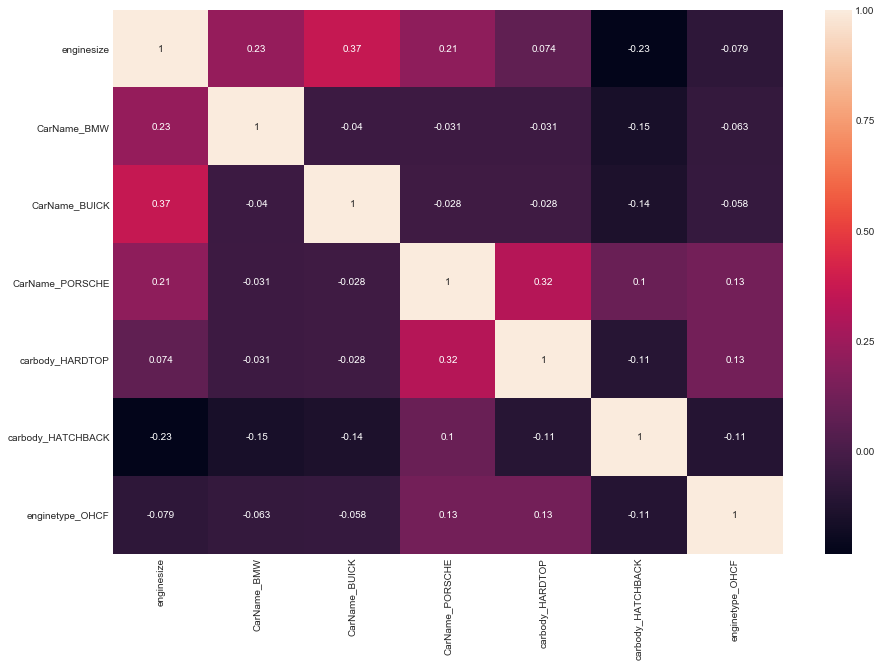

In [236]:
#Drop carbody_WAGON                 
X_train_model11_e = X_train_model10_e.drop(columns=['carbody_WAGON'],axis=1)
#Building Model 11
lm_model11_e = buildlinearmodel(X_train_model11_e, y_train, 'Yes')
print(lm_model11_e.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model11_e.corr(),annot = True)

<b>Observation</b> : After dropping carbody_WAGON column, Adjusted R-square is 0.83

 - carbody_HARDTOP is having high p-value. So dropping it.

                 Var   Vif
0         enginesize  1.88
2      CarName_BUICK  1.33
4  carbody_HATCHBACK  1.27
3    CarName_PORSCHE  1.20
5    enginetype_OHCF  1.17
1        CarName_BMW  1.14
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.43e-51
Time:                        22:42:30   Log-Likelihood:                 162.61
No. Observations:                 143   AIC:                            -311.2
Df Residuals:                     136   BIC:                            -290.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     

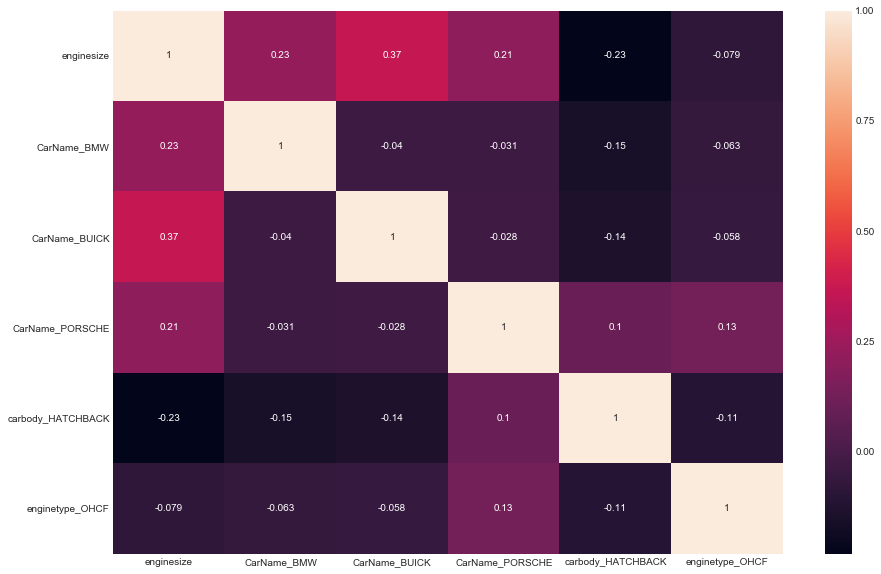

In [237]:
#Drop carbody_HARDTOP                 
X_train_model12_e = X_train_model11_e.drop(columns=['carbody_HARDTOP'],axis=1)
#Building Model 12
lm_model12_e = buildlinearmodel(X_train_model12_e, y_train, 'Yes')
print(lm_model12_e.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model12_e.corr(),annot = True)

<b>Observation</b> : After dropping carbody_HARDTOP, Adjusted R-square is 0.830

 - enginetype_OHCF is having high p-value. So dropping this column for now       

                 Var   Vif
0         enginesize  1.83
2      CarName_BUICK  1.32
4  carbody_HATCHBACK  1.27
1        CarName_BMW  1.13
3    CarName_PORSCHE  1.09
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.68e-52
Time:                        22:42:31   Log-Likelihood:                 161.93
No. Observations:                 143   AIC:                            -311.9
Df Residuals:                     137   BIC:                            -294.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

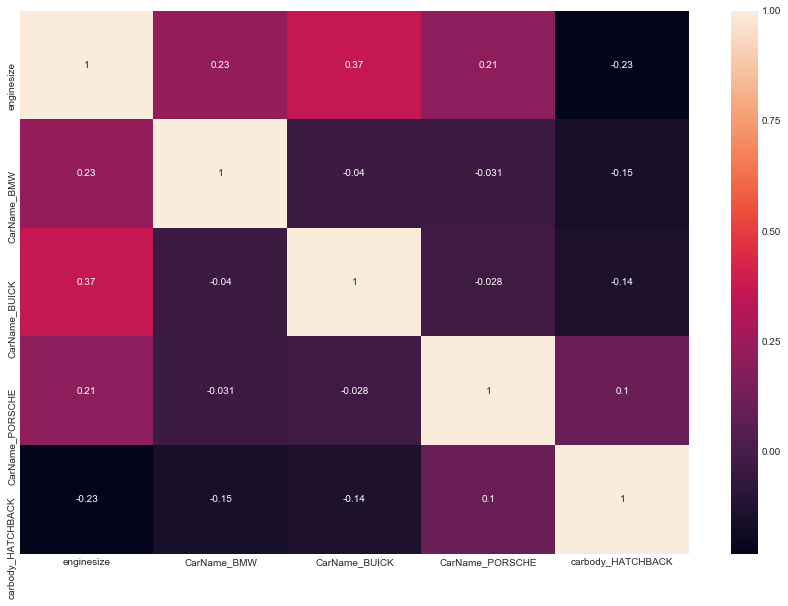

In [238]:
#Drop enginetype_OHCF                                     
X_train_model13_e = X_train_model12_e.drop(columns=['enginetype_OHCF'],axis=1)
#Building Model 13
lm_model13_e = buildlinearmodel(X_train_model13_e, y_train, 'Yes')
print(lm_model13_e.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model13_e.corr(),annot = True)

<b>Observation</b>: After dropping enginetype_OHCF, Adjusted R-square remains same at 0.831.

 - carbody_HATCHBACK is having high p-value.So dropping it.

               Var   Vif
0       enginesize  1.45
2    CarName_BUICK  1.26
1      CarName_BMW  1.10
3  CarName_PORSCHE  1.09
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.24e-53
Time:                        22:42:32   Log-Likelihood:                 161.02
No. Observations:                 143   AIC:                            -312.0
Df Residuals:                     138   BIC:                            -297.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-

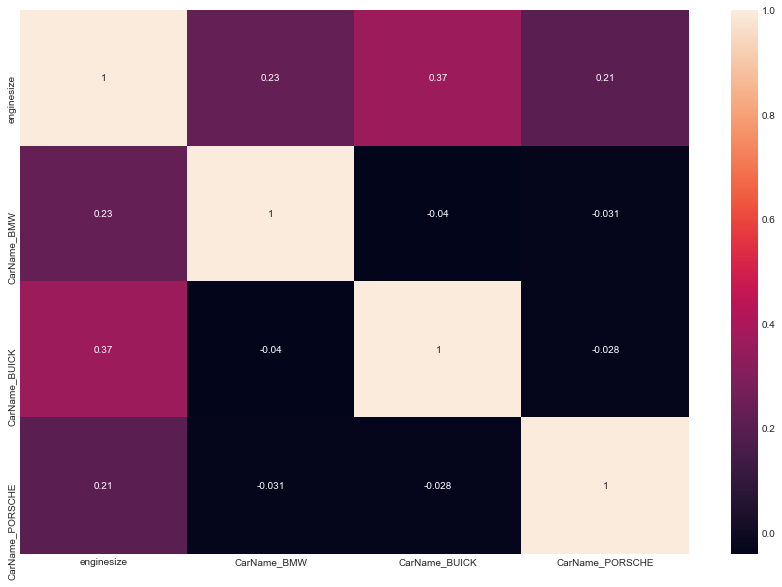

In [239]:
#Drop carbody_HATCHBACK                                         
X_train_model14_e = X_train_model13_e.drop(columns=['carbody_HATCHBACK'],axis=1)
#Building Model 14
lm_model14_e = buildlinearmodel(X_train_model14_e, y_train, 'Yes')
print(lm_model14_e.summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model14_e.corr(),annot = True)

### Model 14_e is looking good with VIF < 2 and p values almost equal to 0

This model considered enginesize. We will compare both by using Prediction model at the end.

### Summary of Building the Models :

- We have arrived at two models - Model 14 with horsepower and Model 14_e with enginesize.
- Both the models have VIF < 2 and p-value is almost equal or near to zero.
- Model 14_e Adjusted R-square(0.83) is slightly better than Model 14(0.826).

## Step_5: Comparing the models by Making Predictions

<b> We have to compare Model 14 and Model 14_e using Model Evaluation Metrics.</b>

In [240]:
#Predicting with Model 14(horsepower)
#Adding constant variable to test dataframe
X_test_m14 = sm.add_constant(X_test)
# Modifying X_test_m14 dataframe by selecting only model variables
X_test_m14 = X_test_m14[['const','horsepower','CarName_BMW','CarName_BUICK','carbody_HATCHBACK']]
# Making predictions
y_pred_m14 = lm_model14.predict(X_test_m14)

In [241]:
#Predicting with Model 14_e(enginesize)
#Adding constant variable to test dataframe
X_test_m14_e = sm.add_constant(X_test)
# Modifying X_test_m14_e dataframe by selecting only model variables
X_test_m14_e = X_test_m14_e[['const','enginesize','CarName_BMW','CarName_BUICK','CarName_PORSCHE']]
# Making predictions
y_pred_m14_e = lm_model14_e.predict(X_test_m14_e)

Text(0,0.5,'Views')

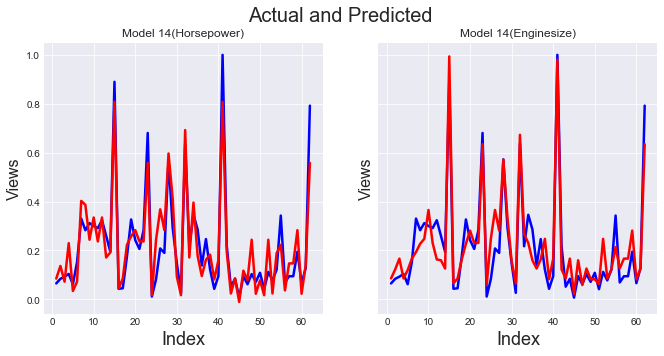

In [242]:
#Actual vs Predicted for all Models 14 and Model 14_e
c = [i for i in range(1,X_test.shape[0]+1,1)]
#Creating two subplots to compare both the models
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(11, 5))
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
# Creating subplot for Model 14
ax1.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
ax1.plot(c,y_pred_m14, color="red",  linewidth=2.5, linestyle="-")
ax1.set_title('Model 14(Horsepower)') #Title
ax1.set_xlabel('Index', fontsize=18)                               # X-label
ax1.set_ylabel('Views', fontsize=16)                               # Y-label
# Creating subplot for Model 14_e
ax2.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
ax2.plot(c,y_pred_m14_e, color="red",  linewidth=2.5, linestyle="-")
ax2.set_title('Model 14(Enginesize)') #Title
ax2.set_xlabel('Index', fontsize=18)                               # X-label
ax2.set_ylabel('Views', fontsize=16)                               # Y-label

Text(0,0.5,'y_pred')

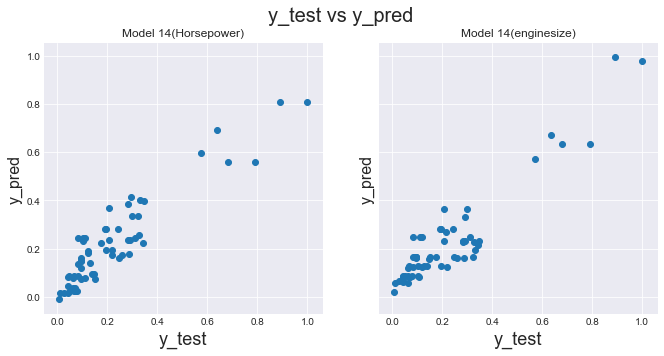

In [243]:
# Plotting y_test and y_pred to understand the spread for Model 14 and Model 14_e
#Creating two subplots to compare both the models
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(11, 5))
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
# Creating subplot for Model 14
ax1.scatter(y_test,y_pred_m14)
ax1.set_title('Model 14(Horsepower)') #Title
ax1.set_xlabel('y_test', fontsize=18)                               # X-label
ax1.set_ylabel('y_pred', fontsize=16)                               # Y-label
# Creating subplot for Model 14_e
ax2.scatter(y_test,y_pred_m14_e)
ax2.set_title('Model 14(enginesize)') #Title
ax2.set_xlabel('y_test', fontsize=18)                               # X-label
ax2.set_ylabel('y_pred', fontsize=16)                               # Y-label

Text(0,0.5,'y_test-y_pred')

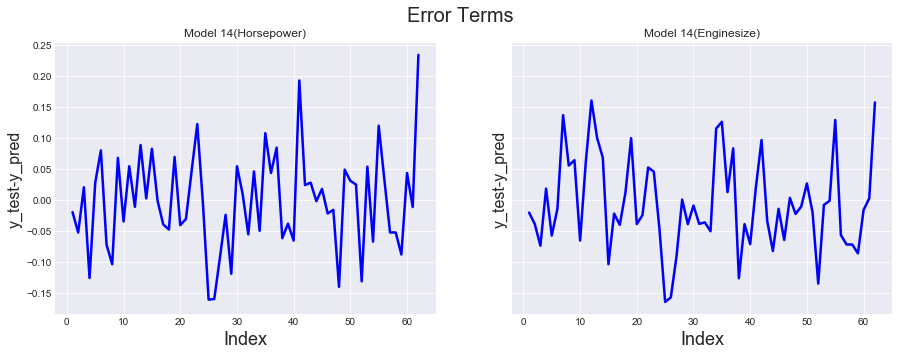

In [244]:
# Plotting the error terms for two Models 14 and Model 14_e
#Creating two subplots to compare both the models
c = [i for i in range(1,X_test.shape[0]+1,1)]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Error Terms', fontsize=20) # Plot heading 
# Creating subplot for Model 14
ax1.plot(c,y_test-y_pred_m14, color="blue", linewidth=2.5, linestyle="-")
ax1.set_title('Model 14(Horsepower)') #Title
ax1.set_xlabel('Index', fontsize=18)        # X-label
ax1.set_ylabel('y_test-y_pred', fontsize=16)    # Y-label
# Creating subplot for Model 14_e
ax2.plot(c,y_test-y_pred_m14_e, color="blue", linewidth=2.5, linestyle="-")
ax2.set_title('Model 14(Enginesize)') #Title
ax2.set_xlabel('Index', fontsize=18)    # X-label
ax2.set_ylabel('y_test-y_pred', fontsize=16)  #Y-label

Text(0,0.5,'Index')

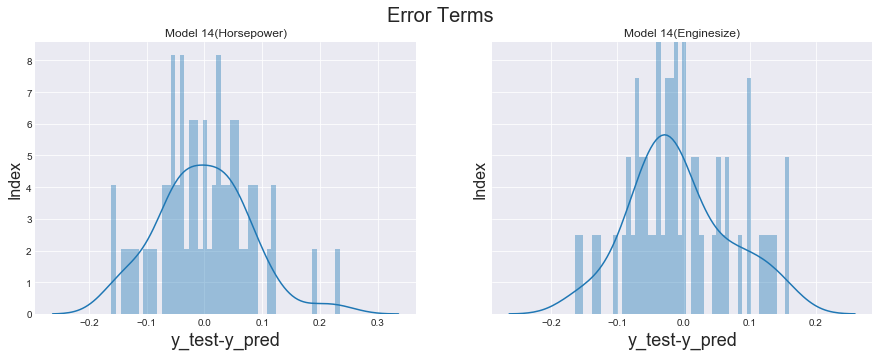

In [245]:
# Plotting the error terms to understand the distribution for two Models 14 and Model 14_e
#Creating two subplots to compare both the models
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Error Terms', fontsize=20) # Plot heading 
# Creating subplot for Model 14
sns.distplot((y_test-y_pred_m14),bins=50,ax=ax1)
ax1.set_title('Model 14(Horsepower)') #Title
ax1.set_xlabel('y_test-y_pred', fontsize=18)                               # X-label
ax1.set_ylabel('Index', fontsize=16)                               # Y-label
# Creating subplot for Model 14_e
sns.distplot((y_test-y_pred_m14_e),bins=50,ax=ax2)
ax2.set_title('Model 14(Enginesize)') #Title
ax2.set_xlabel('y_test-y_pred', fontsize=18)                               # X-label
ax2.set_ylabel('Index', fontsize=16)                               # Y-label

In [246]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print('Mean_Squared_Error for Model 14(Horsepower) :' ,mean_squared_error(y_test, y_pred_m14))
print('Mean_Squared_Error for Model 14(Enginesize) :' ,mean_squared_error(y_test, y_pred_m14_e))
print('RMSE for Model 14(Horsepower) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m14)))
print('RMSE for Model 14(Enginesize) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m14_e)))
print('R-squared value for Model 14(Horsepower) :', r2_score(y_test, y_pred_m14))
print('R-squared value for Model 14(Enginesize) :', r2_score(y_test, y_pred_m14_e))

Mean_Squared_Error for Model 14(Horsepower) : 0.006193142216395283
Mean_Squared_Error for Model 14(Enginesize) : 0.005624046987328982
RMSE for Model 14(Horsepower) : 0.07869651972225508
RMSE for Model 14(Enginesize) : 0.0749936463130643
R-squared value for Model 14(Horsepower) : 0.8564991146905792
R-squared value for Model 14(Enginesize) : 0.8696855822934361


<b>Observation</b> : Low RMSE, Low MSE and High R-Square indicate better fit. In this case Model 14_e (enginesize) looks better fit than Model 14(Horsepower)

### Let us confirm the above result using bootstrapping technique

## BootStrap Technique

Since the size of source dataset is small, we are using bootstrapping technique to resample and create a large dataset for our model prediction

In [247]:
values = cardetailsdata.values
# configure bootstrap - We will use 1,0000 bootstrap iterations and select a sample that is 90% the size of the dataset.
n_iterations = 10000
n_size = int(len(cardetailsdata))
# run bootstrap
from sklearn.utils import resample
for i in range(n_iterations):
    # prepare train sets
    train_set1 = resample(values, n_samples=n_size)
for i in range(n_iterations):
    # prepare train sets
    train_set2 = resample(values, n_samples=n_size)

train_set1 = pd.DataFrame(data=train_set1[1:,0:],    # values
                 columns=cardetailsdata.columns) 
train_set2 = pd.DataFrame(data=train_set2[1:,0:],    # values
                 columns=cardetailsdata.columns) 
print(train_set1.shape)
print(train_set2.shape)

(204, 65)
(204, 65)


In [248]:
#Predicting Model 14(Horsepower) with bootstrap data - train_set1 and train_set2
#Adding constant variable to test dataframe
X_boot_m14_1 = sm.add_constant(train_set1)
# Modifying X_boot_m14_1 dataframe by selecting only model variables from train_set1
X_boot_m14_1 = X_boot_m14_1[['const','horsepower','CarName_BMW','CarName_BUICK','carbody_HATCHBACK']]
# Making predictions
y_pred_boot_m14_1 = lm_model14.predict(X_boot_m14_1)

#Adding constant variable to test dataframe
X_boot_m14_2 = sm.add_constant(train_set2)
# Modifying X_boot_m14_2 dataframe by selecting only model variables from train_set2
X_boot_m14_2 = X_boot_m14_2[['const','horsepower','CarName_BMW','CarName_BUICK','carbody_HATCHBACK']]
# Making predictions
y_pred_boot_m14_2 = lm_model14.predict(X_boot_m14_2)

print('Mean_Squared_Error for Model 14(Horsepower) train_set_1 :' ,mean_squared_error(train_set1.price, y_pred_boot_m14_1))
print('Mean_Squared_Error for Model 14(Horsepower) train_set_2 :' ,mean_squared_error(train_set2.price, y_pred_boot_m14_2))
print('RMSE for Model 14(Horsepower) train_set_1 :', np.sqrt(metrics.mean_squared_error(train_set1.price, y_pred_boot_m14_1)))
print('RMSE for Model 14(Horsepower) train_set_2 :', np.sqrt(metrics.mean_squared_error(train_set2.price, y_pred_boot_m14_2)))
print('R-squared value for Model 14(Horsepower) train_set_1:', r2_score(train_set1.price, y_pred_boot_m14_1))
print('R-squared value for Model 14(Horsepower) train_set_2 :', r2_score(train_set2.price, y_pred_boot_m14_2))

Mean_Squared_Error for Model 14(Horsepower) train_set_1 : 0.005585590147193685
Mean_Squared_Error for Model 14(Horsepower) train_set_2 : 0.006034396026577386
RMSE for Model 14(Horsepower) train_set_1 : 0.07473680584018616
RMSE for Model 14(Horsepower) train_set_2 : 0.07768137503016657
R-squared value for Model 14(Horsepower) train_set_1: 0.8510141577341513
R-squared value for Model 14(Horsepower) train_set_2 : 0.847629363183359


In [249]:
#Predicting Model 14(Enginesize) with bootstrap data - train_set1 and train_set2
#Adding constant variable to test dataframe
X_boot_m14_e_1 = sm.add_constant(train_set1)
# Modifying X_boot_m14_e_1 dataframe by selecting only model variables from train_set1
X_boot_m14_e_1 = X_boot_m14_e_1[['const','enginesize','CarName_BMW','CarName_BUICK','CarName_PORSCHE']]
# Making predictions
y_pred_boot_m14_e1 = lm_model14_e.predict(X_boot_m14_e_1)

#Adding constant variable to test dataframe
X_boot_m14_e_2 = sm.add_constant(train_set2)
# Modifying X_boot_m14_e_2 dataframe by selecting only model variables from train_set2
X_boot_m14_e_2 = X_boot_m14_e_2[['const','enginesize','CarName_BMW','CarName_BUICK','CarName_PORSCHE']]
# Making predictions
y_pred_boot_m14_e2 = lm_model14_e.predict(X_boot_m14_e_2)

print('Mean_Squared_Error for Model 14(Enginesize) train_set_1 :' ,mean_squared_error(train_set1.price, y_pred_boot_m14_e1))
print('Mean_Squared_Error for Model 14(Enginesize) train_set_2 :' ,mean_squared_error(train_set2.price, y_pred_boot_m14_e2))
print('RMSE for Model 14(Enginesize) train_set_1 :', np.sqrt(metrics.mean_squared_error(train_set1.price, y_pred_boot_m14_e1)))
print('RMSE for Model 14(Enginesize) train_set_2 :', np.sqrt(metrics.mean_squared_error(train_set2.price, y_pred_boot_m14_e2)))
print('R-squared value for Model 14(Enginesize) train_set_1:', r2_score(train_set1.price, y_pred_boot_m14_e1))
print('R-squared value for Model 14(Enginesize) train_set_2 :', r2_score(train_set2.price, y_pred_boot_m14_e2))

Mean_Squared_Error for Model 14(Enginesize) train_set_1 : 0.0055708062381454575
Mean_Squared_Error for Model 14(Enginesize) train_set_2 : 0.00423518350219566
RMSE for Model 14(Enginesize) train_set_1 : 0.0746378338253828
RMSE for Model 14(Enginesize) train_set_2 : 0.06507828748665456
R-squared value for Model 14(Enginesize) train_set_1: 0.8514084926358337
R-squared value for Model 14(Enginesize) train_set_2 : 0.8930601166342577


## Observation : 

<b>Even with bootstrapping technique, we can prove that Model14_e(Enginesize) is better than Model14(Horsepower).
Low RMSE, Low Mean_Squared_Error and High R-squared values indicate Model14_e(Enginesize) is a better fit </b>

 ## Conclusion :
 
 ### Model Results Summary :
 
 After evaluating various models, we have identified the following variables as most significant variables to predict car price in US market.
 - enginesize
 - CarName_BMW
 - CarName_BUICK
 - CarName_PORSCHE
 
 So to conclude, Geely should consider enginesize while designing the cars and it should follow the business strategy of BMW, BUICK, PORSCHE to meet certain price levels.

<b> Please note that based on the domain we felt that there is no need to take any action in outliers. If we have taken any action in outliers, the model accuracy might have changed.</b>